In this post, I would like to discuss something that struck me a couple of months ago: why doesn't Python have a builtin argmax function? The [argmax points of a function](https://en.wikipedia.org/wiki/Arg_max) are the ones that maximize the value of the function over a given domain.

# The beginner's point of view 

When I first started programming in Python, I quickly learned about the `max` keyword, that allows to easily extract the biggest item of an iterable. For example:

In [1]:
l = [1, 3, 75, 4, 9]

In [2]:
max(l)

75

# Come in Numpy 

After my beginner years, I moved on to numerical computing with Python and Numpy. Numpy features both a `max` and an `argmax` function:

In [3]:
import numpy as np

In [4]:
np.max

<function numpy.core.fromnumeric.amax>

In [5]:
np.argmax

<function numpy.core.fromnumeric.argmax>

The basic way to use `argmax` is like this:

In [6]:
np.argmax(l)

2

This means that the biggest value found in the list `l` has index 2:

In [7]:
l[2]

75

# Why argmax is useful: an example 

At that point in my learning history, I realized that the argmax behaviour is very often useful. In numerical computing for example, you might want to know where the minimum value of a function lies:

In [8]:
x = np.linspace(0, 1)
y = -(x - 0.4)**2

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

(-0.4, 0.1)

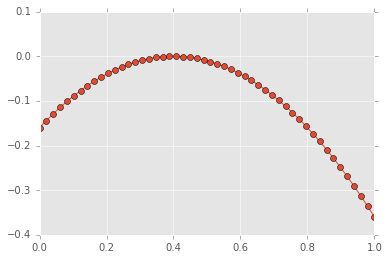

In [10]:
plt.plot(x, y, '-o')
plt.ylim(-0.4, 0.1)

Using argmax, this is easy: find the index of the maximum value in the `y` values and then use that index with the `x` array:

In [11]:
index = np.argmax(y)
x[index]

0.4081632653061224

This however, leads me back to my original question: why doesn't this exist in pure Python? This is often useful for finding the best parameters to functions that are not necessarily numerical!

# It doesn't go by the name argmax... but max! 

It turns how that it exists, and that I just didn't see it all these years, as it was hidden in plain sight!

If you read the [documentation](https://docs.python.org/3/library/functions.html#max) about the builtin `max` function, you'll see it accepts an optional argument called `key`:

> The key argument specifies a one-argument ordering function like that used for list.sort()

If you specify a key function, it will evaluate the function using the values in the list and return the object that maximizes the provided function. This seems like no big deal but actually makes the function work like argmax! 


Let's see it in action. I'll define `f` as the function I used to create the curve shown above, a negative looking parabola.

In [12]:
f = lambda x: -(x - 0.4)**2

Now, I can use the optional keyword `key`:

In [13]:
max(x, key=f)

0.4081632653061224

This is exactly the same result as above using Numpy's argmax. 

# Conclusion 

So, to wrap this article up:

- there is an argmax function builtin with Python, but it doesn't say it's true name
- you can use it with the `key` optional argument
- the likely reason this is so is that it makes it very close in functionality to the `list.sort` function, that also accepts an optional `key` argument

This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20160524_PythonMissingArgmax.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20160524_PythonMissingArgmax.ipynb).